In [1]:
import pandas as pd
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_plotly_dash import JupyterDash
import time
print('ok')

ok


In [68]:
app = JupyterDash('Dash Layout')

app.layout = html.Div([
    dcc.Input(id = 'my-id', value = '初始值', type = 'text'),
    html.Div(id = 'my-div')
])

@app.callback(
    Output(component_id = 'my-div', component_property = 'children'),
    [Input(component_id = 'my-id', component_property = 'value')]
)

def update_output_div(input_value):
    return '你输入了"{}"'.format(input_value)

app

In [ ]:
# 数据源
df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/'
    'datasets/master/gapminderDataFiveYear.csv')

# 设置Dash应用程序
app = JupyterDash('Slider Update Gragh')
app.layout = html.Div([
    dcc.Graph(id = 'graph-with-slider'),
    dcc.Slider(
        id = 'year-slider',
        min = df.year.min(),
        max = df.year.max(),
        value = df.year.min(),
        marks = {str(year): str(year) for year in df.year.unique()},
        step = None
    )
])

# 回调函数
@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('year-slider', 'value')]
)

# 设置布局
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]
    traces = []
    
    for val in filtered_df.continent.unique():
        df_by_continent = filtered_df[filtered_df.continent == val]
        
        traces.append(go.Scatter(
            x = df_by_continent['gdpPercap'],
            y = df_by_continent['lifeExp'],
            text = df_by_continent['country'],
            name = val,
            mode = 'markers',
            opacity = 0.8,
            marker = dict(size = 15, line = dict(width = 0.5, color = 'white'))
        ))
    
    fig = dict(
        data = traces,
        layout = go.Layout(
            xaxis = dict(type = 'log', title = '人均GDP'),
            yaxis = dict(title = '平均寿命', range = [20, 90]),
            margin = dict(l = 40, b = 40, t = 10, r = 10),
            hovermode = 'closest'
        )
    )
    
    return fig

app

In [69]:
# 数据
df = pd.read_csv(
    'https://gist.githubusercontent.com/chriddyp/'
    'cb5392c35661370d95f300086accea51/raw/'
    '8e0768211f6b747c0db42a9ce9a0937dafcbd8b2/'
    'indicators.csv')

# 设置Dash
app = JupyterDash('many input')
app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
                id = 'xaxis-column',
                options = [{'label': i, 'value': i} for i in df['Indicator Name'].unique()],
                value = 'Fertility rate, total (births per woman)'),
            dcc.RadioItems(
                id = 'xaxis-type',
                options = [{'label': i, 'value': i} for i in ['线性', '日志']],
                value = '线性',
                labelStyle = dict(display = 'inline-block'))],
            style = dict(width = '48%', display = 'inline-block')
        ),
        html.Div([
            dcc.Dropdown(
                id = 'yaxis-column',
                options = [{'label': i, 'value': i} for i in df['Indicator Name'].unique()],
                value = 'Life expectancy at birth, total (years)'),
            dcc.RadioItems(
                id = 'yaxis-type',
                options = [{'label': i, 'value': i} for i in ['线性', '日志']],
                value = '线性',
                labelStyle = dict(display = 'inline-block'))],
            style = dict(width = '48%', float = 'right', display = 'inline-block')
        )
    ]),
    dcc.Graph(id = 'indicator-graphic'),
    dcc.Slider(
        id = 'year--slider',
        min = df['Year'].min(),
        max = df['Year'].max(),
        value = df['Year'].max(),
        marks = {str(year): str(year) for year in df['Year'].unique()},
        step = None
    ) 
])

# 回调
@app.callback(
    Output('indicator-graphic', 'figure'),
    [Input('xaxis-column', 'value'),
     Input('yaxis-column', 'value'),
     Input('xaxis-type', 'value'),
     Input('yaxis-type', 'value'),
     Input('year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name, xaxis_type, yaxis_type, year_value):
    dff = df[df['Year'] == year_value]
    result = dict(
        data = [go.Scatter(
            x = dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y = dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            text = dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode = 'markers',
            marker = {'size': 15, 'opacity': 0.5, 'line': {'width': 0.5, 'color': 'white'}}
        )],
        layout = go.Layout(
            xaxis = dict(title = xaxis_column_name, type = 'linear' if xaxis_type == '线性' else '日志'),
            yaxis = dict(title = yaxis_column_name, type = 'linear' if yaxis_type == '线性' else '日志'),
            margin = {'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode = 'closest'
        )
    )
    return result

app

URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>

In [5]:
app = JupyterDash('many output')
app.layout = html.Div([
    dcc.RadioItems(
        id = 'button-a',
        options = [{'label': i, 'value': i} for i in ['北京', '天津', '上海']],
        value = '北京'),
    html.Div(id = 'output-a'),
    
    dcc.RadioItems(
        id = 'button-b',
        options = [{'label': i, 'value': i} for i in ['东城区', '西城区', '朝阳区']],
        value = '朝阳区'),
    html.Div(id = 'output-b')
])

@app.callback(
    Output('output-a', 'children'),
    [Input('button-a', 'value')]
)
def callback_a(button_value):
    return f"已选中{button_value}"

@app.callback(
    Output('output-b', 'children'),
    [Input('button-b', 'value')]
)
def callback_a(button_value):
    return f"已选中{button_value}"

app

In [70]:
app = JupyterDash('Chained Callbacks')
all_options = {
    '北京': ['东城区', '西城区', '朝阳区'],
    '上海': ['黄浦区', '静安区', '普陀区']
}

app.layout = html.Div([
    dcc.RadioItems(
        id = 'countries-dropdown',
        options = [{'label': k, 'value': k} for k in all_options.keys()],
        value = '北京'),
    html.Hr(),
    dcc.RadioItems(id = 'cities-dropdown'),
    html.Hr(),
    html.Div(id = 'display-selected-values')
])

@app.callback(
    Output('cities-dropdown', 'options'),
    [Input('countries-dropdown', 'value')])
def set_cities_options(select_country):
    return [{'label': i, 'value': i} for i in all_options[select_country]]

@app.callback(
    Output('cities-dropdown', 'value'),
    [Input('cities-dropdown', 'options')])
def set_cities_value(available_options):
    
    #time.sleep(3)#wait(3)
    return available_options[0]['value']

@app.callback(
    Output('display-selected-values', 'children'),
    [Input('countries-dropdown', 'value'),
     Input('cities-dropdown', 'value')])
def set_display_children(select_country, select_city):
    return f"{select_city}是{select_country}的辖区。"

app

In [3]:
#(六) 日期范围
import arrow as ar
app = JupyterDash('input', height = 350)
app.add_external_link = False
app.layout = html.Div([
    dcc.DatePickerRange(
        id='dt_range',
        start_date=ar.get(2019, 1, 1).date(),
        end_date_placeholder_text='选择日期',
        display_format = 'Y-MM-DD',
        month_format = 'Y-MM',
        first_day_of_week = 1,
        min_date_allowed=ar.get(2010, 1, 1).date(),
        max_date_allowed=ar.get(2020, 10, 1).date()
    ),
    html.Div(id='output-dt')
])

app

In [4]:
#(七) Markdown
app = JupyterDash('input', height = 350)
app.add_external_link = False

app.layout = html.Div([
  dcc.Markdown('''
    #### Dash and Markdown

    Dash supports [Markdown](http://commonmark.org/help).

    Markdown is a simple way to write and format text.
    It includes a syntax for things like **bold text** and *italics*,
    [links](http://commonmark.org/help), inline `code` snippets, lists,
    quotes, and more.
    ''')  
])

app

In [7]:
#(五) 日期按钮
import arrow as ar
app = JupyterDash('input', height = 350)
app.add_external_link = False

app.layout = html.Div([
    dcc.DatePickerSingle(
        id='dt',
        date=time.strftime("%Y-%m-%d", time.localtime()) ,
        display_format = 'Y-MM-DD',
        month_format = 'Y-MM',
        first_day_of_week = 1,
        min_date_allowed=ar.get(2019, 1, 1).date(),
        max_date_allowed=ar.get(2021, 10, 1).date(),
        clearable=True),
    html.Div(id='output-dt')
])

@app.callback(Output('output-dt', 'children'), [Input('dt', 'date')])
def update_output(date):
    str_prefix = '您已选择 : ' if date else '暂无选择'
    str_dt = ar.get(date).format('YYYY-MM-DD') if date else ''
    return str_prefix + str_dt
    
app

In [8]:
app = JupyterDash('input', height = 120)
app.add_external_link = False
app.layout = html.Div([
    html.Button('Buttons', id = 'button'),
    html.Div(id = 'output-id')
])

@app.callback(Output('output-id', 'children'), [Input('button', 'n_clicks')])
def update_output(n_clicks):
    n_clicks = 0 if not n_clicks else n_clicks
    return f"你已点击按钮了{n_clicks}次"

app

In [9]:
app = JupyterDash('input', height = 150)
app.add_external_link = False
app.layout = html.Div([ 
    dcc.RadioItems(
    options=[{'label': '北京', 'value': 'BJ'},
             {'label': '上海', 'value': 'SHH'},
             {'label': '深圳', 'value': 'SZ'}],
    value='BJ',
    )
])

app

In [10]:
app = JupyterDash('input', height = 150)
app.add_external_link = False
app.layout = html.Div([ 
    dcc.Checklist(
    options=[{'label': '北京', 'value': 'BJ'},
             {'label': '上海', 'value': 'SHH'},
             {'label': '深圳', 'value': 'SZ'}],
    value=['BJ', 'SZ']
    )
])

app

In [11]:
app = JupyterDash('input', height = 150)
app.add_external_link = False
app.layout = html.Div([
    dcc.Textarea(
    placeholder='请输入内容...',
    value='这是一个多行文本框的组件',
    style={'width': '100%'}) 
])

app

In [12]:
app = JupyterDash('input', height = 600)
app.add_external_link = False
app.layout = html.Div([
    dcc.Tabs(id = 'tabs', children = [
        dcc.Tab(label = 'tab-1', children = [
            html.Div([dcc.Graph(
                id = 'graph-1',
                figure = dict(data = [dict(x = [1, 2, 3], y = [4, 1, 2], type = 'bar', name = 'users'),
                                      dict(x = [1, 2, 3], y = [2, 4, 5], type = 'bar', name = 'orders')]))])]),
        dcc.Tab(label = 'tab-2', children = [
            html.Div([dcc.Graph(
                id = 'graph-2',
                figure = dict(data = [dict(x = [1, 2, 3], y = [1, 4, 1], type = 'bar', name = 'users'),
                                      dict(x = [1, 2, 3], y = [1, 2, 3], type = 'bar', name = 'orders')]))])]),
        dcc.Tab(label = 'tab-3', children = [
            html.Div([dcc.Graph(
                id = 'graph-3',
                figure = dict(data = [dict(x = [1, 2, 3], y = [2, 4, 3], type = 'bar', name = 'users'),
                                      dict(x = [1, 2, 3], y = [5, 4, 3], type = 'bar', name = 'orders')])
            )])
        ]),
    ])
])

app

In [67]:
df = pd.read_excel('d:\\rep\\000002_main_report.xls')
app = JupyterDash('input', height = 600)
app.add_external_link = False
app.layout = html.Div([
    html.H2('选项卡示例', style = dict(textAlign='center')),
    dcc.Tabs(
        id = 'tabs-example',
        value = 'tab-1',
        children = [dcc.Tab(label = '选项卡一', value = 'tab-1'),
                    dcc.Tab(label = '选项卡二', value = 'tab-2')]),
    html.Div(id = 'tabs-demo')
])

@app.callback(Output('tabs-demo', 'children'), [Input('tabs-example', 'value')])
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            html.H3('内容一'),
            dcc.Graph(
                id='graph-1-tabs',
                figure = dict(data = [dict(x = [1, 2, 3,4], y = [3, 1, 2,6], type = 'bar')])
            )
        ])
    else:
        return html.Div([
            html.H3('内容二'),
            #html.H3(df.columns[0]),
            dcc.Graph(
                id='graph-2-tabs',
                figure = dict(data = [dict(x = df[df.columns[0]][6:10], y = df[df.columns[2]][6:10], type = 'bar', name = df.columns[2]),
                                      dict(x = df[df.columns[0]][6:10], y = df[df.columns[6]][6:10], type = 'bar', name = df.columns[6]),
                                      dict(x = df[df.columns[0]][6:10], y = df[df.columns[10]][6:10], type = 'bar', name = df.columns[10])])
            )
        ])

app

In [14]:
app = JupyterDash('input', height = 150)
app.add_external_link = False
app.layout = html.Div([
    dcc.Input(id = 'df', type = 'number', placeholder = '不延迟显示'),
    dcc.Input(id = 'dt', type = 'number', debounce = True, placeholder = '延迟显示'),
    dcc.Input(id = 'range', type = 'number', placeholder = '范围', min = 10, max = 100, step = 5),
    html.Hr(),
    html.Div(id = 'number-out')
])

@app.callback(Output('number-out', 'children'), [Input('df', 'value'), Input('dt', 'value'), Input('range', 'value')])
def number_render(fval, tval, rangeval):
    return f"方框1: {fval}， 方框2: {tval}， 方框3: {rangeval}"

app

In [15]:
app = JupyterDash('input', height = 150)
app.add_external_link = False
app.layout = html.Div([
    html.I('尝试分别在两个输入框中输入数据，观察回调中如何延迟显示'),
    html.Br(),
    html.Br(),
    html.I('第2个输入框输入内容后，按下Enter键或鼠标点击非操作区，即可显示内容'),
    html.Br(),
    html.Br(),
    dcc.Input(id = 'input1', type = 'text', placeholder = '北京'),
    dcc.Input(id = 'input2', type = 'text', placeholder = '上海', debounce=True),
    html.Div(id = 'output')
])

@app.callback(Output("output", "children"), [Input("input1", "value"), Input("input2", "value")])
def update_output(input1, input2):
    return f"输入框 1 输出：{input1}，输入框 2 输出：{input2}"

app

In [16]:
app = JupyterDash('input', height = 120)
app.add_external_link = False
allowed_types = ("text", "number", "password", "email", "search", "tel", "url", "range", "hidden")
app.layout = html.Div([
    dcc.Input(
        id = f"input_{t}",
        type = t,
        placeholder = f"input type {t}") for t in allowed_types]
    + [html.Div(id="out-all-types")])

@app.callback(Output("out-all-types", "children"), [Input(f"input_{t}", "value") for t in allowed_types])
def cb_render(*vals):
    return ' ~~ '.join((str(val) for val in vals if val))

app

In [17]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        min=0,
        max=30,
        value=[10, 15],
        allowCross=False)],
    style = dict(padding = '5px')
)

app

In [18]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        min=0,
        max=30,
        value=[8, 10, 15, 17, 20],
        pushable=2)],
    style = dict(padding = '5px')
)

app

In [19]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        min=0,
        max=30,
        value=[1, 3, 4, 5, 12, 17])],
    style = dict(padding = '5px')
)

app

In [20]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        min = 0, 
        max = 100,
        value = [10, 65],
        included=False,
        marks = {
            0: {'label': '0 °C', 'style': {'color': '#77b0b1'}},
            26: {'label': '26 °C'},
            37: {'label': '37 °C'},
            100: {'label': '100 °C', 'style': {'color': '#f50'}}
        })],
    style = dict(padding = '5px')
)

app

In [24]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        min = 0,
        max = 10,
        step = None,
        marks = {0: '0 °F', 3: '3 °F', 5: '5 °F', 7.65: '7.65 °F', 10: '10 °F'},
        value = [3, 7.65]
    )],
    style = dict(padding = '15px'),
)

app

In [25]:
app = JupyterDash('range_slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.RangeSlider(
        id = 'my-range-slider',
        min = 0,
        max = 20,
        step = 0.5,
        value = [5, 15]),
    html.Div(id = 'output-container-range-slider')
])

@app.callback(Output('output-container-range-slider', 'children'), [Input('my-range-slider', 'value')])
def update_output(value):
    return f"你选择的范围：{value}"

app

In [26]:
app = JupyterDash('slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.Slider(
        id = 'slider-updatemode',
        max = 3, 
        step = 0.01,
        value = 2,
        updatemode = 'drag',
        marks = {i: f"{str(10 ** i)}" for i in range(4)}),
    html.Div(id = 'updatemode-output-container', style = dict(marginTop = 20,))],
    style = dict(padding = '5px'))

@app.callback(Output('updatemode-output-container', 'children'), [Input('slider-updatemode', 'value')])
def display_value(value):
    return f"线性值：{value} | 对数值：{value ** 10}"

app

In [27]:
app = JupyterDash('slider', height = 120)
app.add_external_link = False
app.layout = html.Div([
    dcc.Slider(
        min = 0, 
        max = 100,
        value = 65,
        included=False,
        marks = {
            0: {'label': '0 °C', 'style': {'color': '#77b0b1'}},
            26: {'label': '26 °C'},
            37: {'label': '37 °C'},
            100: {'label': '100 °C', 'style': {'color': '#f50'}}
        })],
    style = dict(padding = '5px')
)

app

In [28]:
app = JupyterDash('slider', height = 120)
app.layout = html.Div([
    dcc.Slider(
        min = 0,
        max = 10,
        step = None,
        marks = {0: '0 °F', 3: '3 °F', 5: '5 °F', 7.65: '7.65 °F', 10: '10 °F'},
        value = 7.65
    )],
    style = dict(padding = '5px'),
)

app

In [29]:
app = JupyterDash('slider', height = 120)

app.layout = html.Div([
    dcc.Slider(
        id = 'my-slider',
        min = 0,
        max = 20,
        step = 0.5,
        value = 10),
    html.Div(id = 'slider-output-container')
])

@app.callback(Output('slider-output-container', 'children'), [Input('my-slider', 'value')])
def update_output(value):
    return f"你已选择到：{value}"

app

In [30]:
app = JupyterDash('dropdown01', height = 150)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海', 'disabled': True}, 
                   {'label': '深圳', 'value': '深圳'}],
        value = '北京'),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    return f"您已经选择：【{value}】"

app

In [34]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        disabled = True),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    pass

app

In [32]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        placeholder = '选择一个城市名称'),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    pass

app

In [36]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        value = '北京',
        clearable = False),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    return f"您已经选择：【{value}】"

app

In [40]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        searchable=False),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    pass

app

In [38]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        value = ['北京', '上海'],
        multi = True),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    return f"您已经选择：【{'、'.join([val for val in value])}】"

app

In [41]:
app = JupyterDash('dropdown01', height = 120)
app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': '北京', 'value': '北京'}, 
                   {'label': '上海', 'value': '上海'}, 
                   {'label': '深圳', 'value': '深圳'}],
        value = '北京'),
    html.Div(id = 'output-01')
])

@app.callback(Output('output-01', 'children'), [Input('my_dropdown', 'value')])
def update_output(value):
    return f"您已经选择：【{value}】"

app

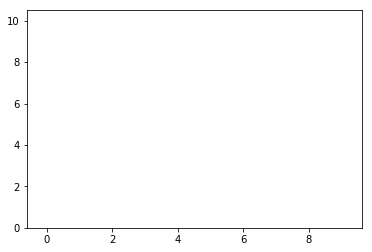

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation  
fig, ax = plt.subplots() 
x, y, tmp = [], [], []  
for i in range(10):
    x.append(i)
    y.append(i+1)
    temp = ax.bar(x, height=y, width=0.3)
    tmp.append(temp)
ani = animation.ArtistAnimation(fig, tmp, interval=200, repeat_delay=1000) 
ani.save("bar.gif", writer='pillow') 

